# Applicant dataset for SVM classification

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)
pd.options.mode.chained_assignment = None 

import mglearn

/var/folders/f0/6n5cj1pd2td3sgkgfsl766lr0000gn/T/ipykernel_39800/2316261674.py:25: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if original_data.dtypes[column] ==np.object:
/var/folders/f0/6n5cj1pd2td3sgkgfsl766lr0000gn/T/ipykernel_39800/2316261674.py:25: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if original_data.dtypes[column] ==np.object:
/var/folders/f0/6n5cj1pd2td3sgkgfsl766lr0000gn/T/ipykernel_39800/2316261674.py:25: DeprecationWarning: `np.object` is a deprecated

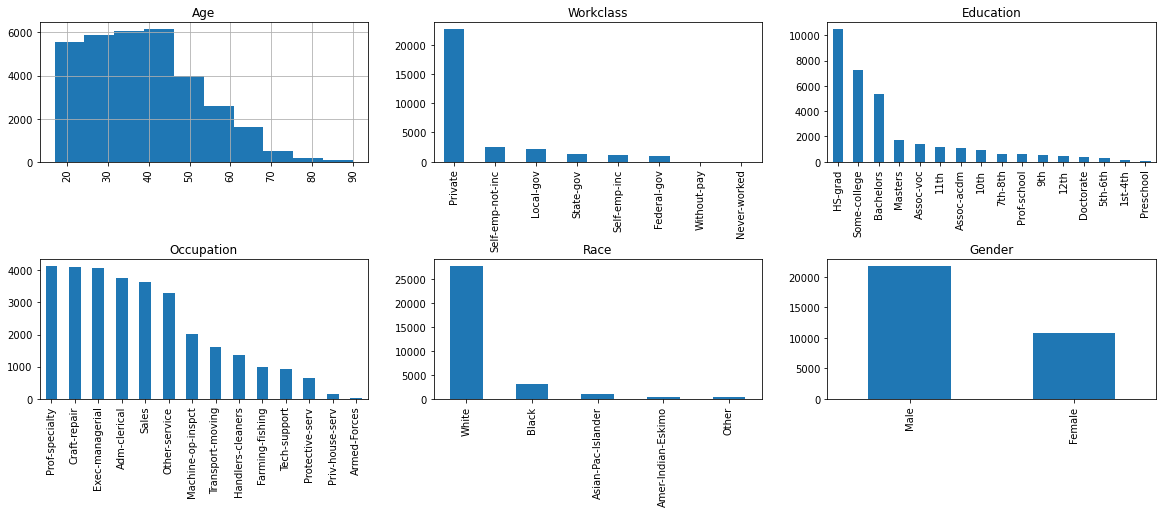

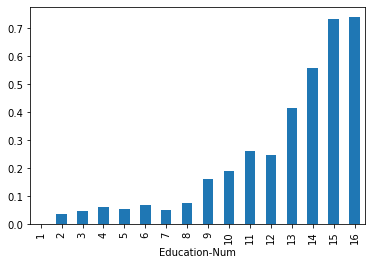

0.7861200675571933


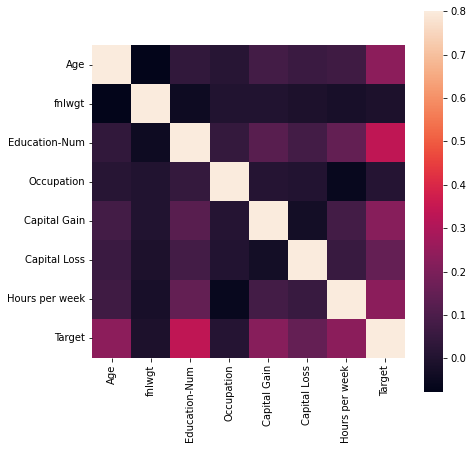

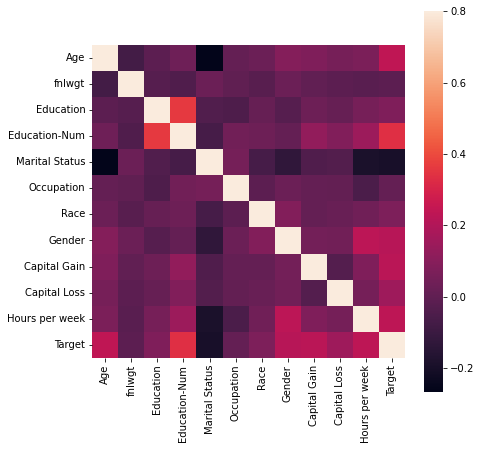

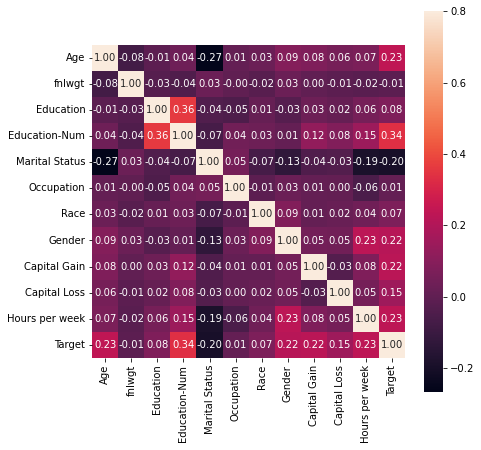

0.7953324120988792
0.7953324120988792
0.796714263780132


In [3]:
#read the data
original_data =pd.read_csv(
    "/Users/yuliabezginova/PycharmProjects/deep_learning/applicant.csv",
    names=[
        "Age","Workclass","fnlwgt","Education","Education-Num","Marital Status",
        "Occupation","Relationship","Race","Gender","Capital Gain","Capital Loss",
        "Hours per week","Country","Target"],
    sep=r'\s*,\s*',
    engine='python',
    na_values='?')
original_data.head()

#plot the graph
import matplotlib.pyplot as plt
import math
get_ipython().run_line_magic('matplotlib', 'inline')

fig = plt.figure(figsize=(20,20))
cols=3
rows=math.ceil(float(original_data.shape[1])/cols)

for i,column in enumerate(['Age','Workclass','Education','Occupation','Race','Gender']):
    ax=fig.add_subplot(rows,cols,i+1)
    ax.set_title(column)
    if original_data.dtypes[column] ==np.object: 
        original_data[column].value_counts().plot(kind="bar",axes=ax)
    else:
        original_data[column].hist(axes=ax)
        plt.xticks(rotation='vertical')
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

#show data
import sklearn.preprocessing as preprocessing
le=preprocessing.LabelEncoder()
original_data['Occupation']=le.fit_transform(original_data['Occupation'].astype(str))
original_data.head()


original_data['Target']=le.fit_transform(original_data['Target'].astype(str))
original_data.tail()

#show the graph
original_data.groupby('Education-Num').Target.mean().plot(kind='bar')
plt.show()

#train test data
from sklearn.model_selection import train_test_split
X=original_data[['Education-Num','Occupation']]
Y=original_data['Target']
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

#train the model using SVM classifier (SVC)
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(X_train,Y_train)
score=classifier.score(x_test,y_test)
print(score)

#seaborn for heatmap charts
import seaborn as sns
corrmat=original_data.corr()
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,vmax=.8, square=True);
plt.show()

original_data['Race']=le.fit_transform(original_data['Race'].astype(str))
original_data['Gender']=le.fit_transform(original_data['Gender'].astype(str))
original_data['Marital Status']=le.fit_transform(original_data['Marital Status'].astype(str))
original_data['Education']=le.fit_transform(original_data['Education'].astype(str))
corrmat=original_data.corr()
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,vmax=.8, square=True);
plt.show()

f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,vmax=.8,square=True,annot=True,fmt='.2f')
plt.show()

#score the model
X=original_data[['Education-Num','Occupation','Age','Gender']]
Y=original_data['Target']
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
classifier=SVC()
classifier.fit(X_train,Y_train)
score=classifier.score(x_test,y_test)
print(score)

classifier =SVC(kernel='rbf', C=1.0)
classifier.fit(X_train,Y_train)
score=classifier.score(x_test,y_test)
print(score)

classifier =SVC(kernel='linear', C=10.0)
classifier.fit(X_train,Y_train)
score=classifier.score(x_test,y_test)
print(score)

***Thank you for going through this project. Your comments are more then welcome to ybezginova2021@gmail.com***

***Best wishes,***

***Yulia***